## Data preprocessing with pandas

This notebook treats the UCI heart disease data (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) to prepare for further analysis. Correlation analysis will be performed to determine which features in the dataset we are interested in for our models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

#seed = 0
#random.seed(seed); np.random.seed(seed)

import warnings
warnings.filterwarnings('ignore') 

## Importing data

We're using a modified version of the original datasets, featuring measurements from Cleveland, VA Long Beach, Switzerland and Hungary and with associated feature names. This set contains 14 (excluding 'id' in the first column and target value in the last) of the 74 features in the original datasets, which seems to be convention in most literature using the dataset.

The original data had some missing data, but this seems to have been cleaned/interpolated for this modified set.

csv file: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

Data preparation procedure inspired by this kaggle notebook: https://www.kaggle.com/code/datafan07/heart-disease-and-some-scikit-learn-magic/notebook.

In [2]:
# all data accessed on 22.11.22
#dataframe = pd.read_csv('heart_disease_uci.csv')

dataframe = pd.read_csv('heart_cleveland_upload.csv')

# display 5 random data samples
print(f'Shape of dataset (instances, features): {dataframe.shape}')
#print(f'Unique observations: \n{dataframe.nunique()}')
print('\nRandom samples from dataset:')
dataframe.sample(8)

Shape of dataset (instances, features): (297, 14)

Random samples from dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
291,40,1,3,110,167,0,2,114,1,2.0,1,0,2,1
176,64,0,3,130,303,0,0,122,0,2.0,1,2,0,0
44,54,0,1,132,288,1,2,159,1,0.0,0,1,0,0
75,69,1,2,140,254,0,2,146,0,2.0,1,3,2,1
14,56,1,0,120,193,0,2,162,0,1.9,1,0,2,0
264,50,1,3,144,200,0,2,126,1,0.9,1,0,2,1
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2,0
247,54,1,3,110,206,0,2,108,1,0.0,1,1,0,1


Feature documentation: \
\
-sex (1 = male, 0 = female)\
-cp: chest pain type \
-- Value 1: typical angina \
-- Value 2: atypical angina \
-- Value 3: non-anginal pain \
-- Value 4: asymptomatic \
-trestbps: resting blood pressure (in mm Hg on admission to the hospital)\
-chol: cholesterol measure in mg/dl \
-fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\
-restecg: ecg observation at resting condition \
-- Value 0: normal\
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\
-thalach: maximum heart rate achieved \
-exang: exercise induced angina (1 = yes; 0 = no)\
-oldpeak: ST depression induced by exercise relative to rest\
-slope: the slope of the peak exercise ST segment\
-- Value 1: upsloping\
-- Value 2: flat\
-- Value 3: downsloping\
-ca: number of major vessels (0-3) colored by flourosopy\
-thal: 3 = normal; 6 = fixed defect; 7 = reversable defect\
-condition: 1 = diagnosed heart disease, 0 = not diagnosed

## Feature correlation analysis

Correlation heatmap excludes top triangle because of symmetry across diagonal, diagonal gives perfect correlation which desaturates all other positive values, thus removed as well.

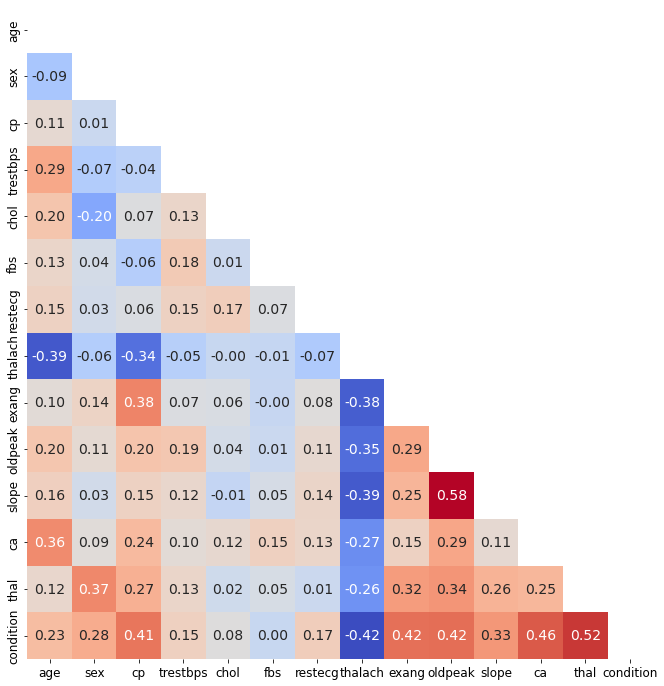

In [3]:
#Compute pairwise correlation of columns, excluding NA/null values.
correlation = dataframe.corr(method='pearson')

mask = np.triu(correlation) #diagonal + upper triangle redundant
fig=plt.figure(figsize=(14,12))
sns.heatmap(correlation, mask=mask, cmap='coolwarm', annot=True, annot_kws={'size':14}, fmt='.2f')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
fig.get_axes()[1].remove()#; plt.savefig('Corr_Heatmap')
plt.show()

### Feature extraction

Judging from the correlation to condition, we'll select all features with absolute values above 0.2 in the bottom row.

In [7]:
# convert dataframe to numpy array form, remove given features
y = np.array(dataframe['condition'])
#X = np.array(dataframe.drop(['condition'], axis=1)) #keep all features
X = np.array(dataframe.drop(['condition', 'fbs'], axis=1)) #exclude fbs from X


#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size = 0.2)

#saving preprocessed data
#np.save('Heart_data_nofbs', [X_train, X_test, y_train, y_test])

### Visualizing distribution of numeric features

We'll present the distribution of some selected data by scatter plotting features with strong (positive or negative) correlations to eachother and color coding their corresponding conditions to see if there is a distribution pattern. Labels will be renamed for easier understanding.

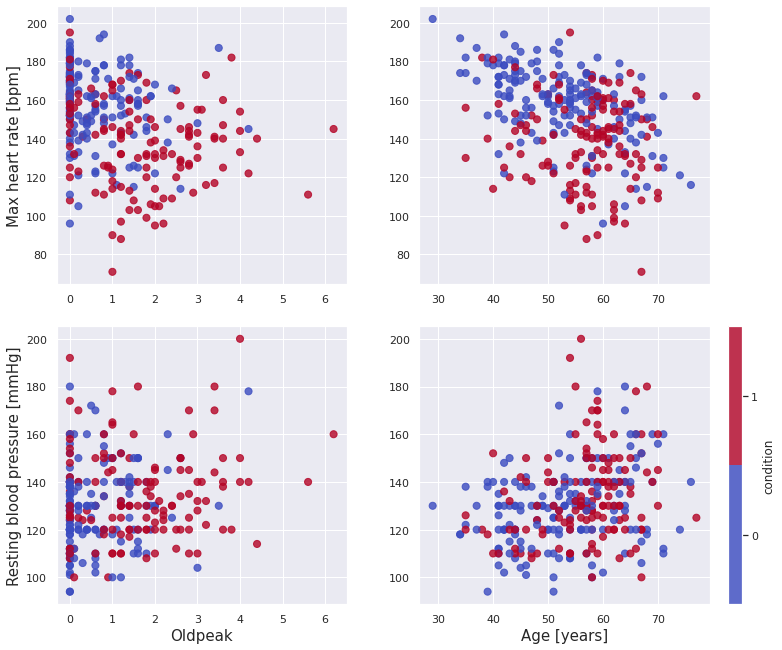

In [5]:
#convert from numeric to categorical for correct label
dataframe['condition'] = pd.Categorical(dataframe['condition'])

sns.set() #standard seaborne style
plt.rcParams.update({'font.size': 12})
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13,11))

cmap = 'coolwarm'
dataframe.plot.scatter(x="oldpeak", y="thalach", c="condition", cmap=cmap, s=50, ax=ax1, alpha=0.8);
ax1.set_ylabel('Max heart rate [bpm]', fontsize=15); ax1.set_xlabel('')

dataframe.plot.scatter(x="age", y="thalach", c="condition", cmap=cmap, s=50, ax=ax2, alpha=0.8);
ax2.set_ylabel(''); ax2.set_xlabel('') 

dataframe.plot.scatter(x="oldpeak", y="trestbps", c="condition", cmap=cmap, s=50, ax=ax3, alpha=0.8);
ax3.set_xlabel('Oldpeak', fontsize=15); ax3.set_ylabel('Resting blood pressure [mmHg]', fontsize=15) 

dataframe.plot.scatter(x="age", y="trestbps", c="condition", cmap=cmap, s=50, ax=ax4, alpha=0.8);
ax4.set_ylabel(''); ax4.set_xlabel('Age [years]', fontsize=15)

# removing the first three colorbars
for i in range(3): fig.get_axes()[4].remove()

plt.subplots_adjust(wspace=0.0005, hspace=0.15)#; plt.savefig('Heart_Scatter')
plt.show()

### Visualizing distribution of categorical features

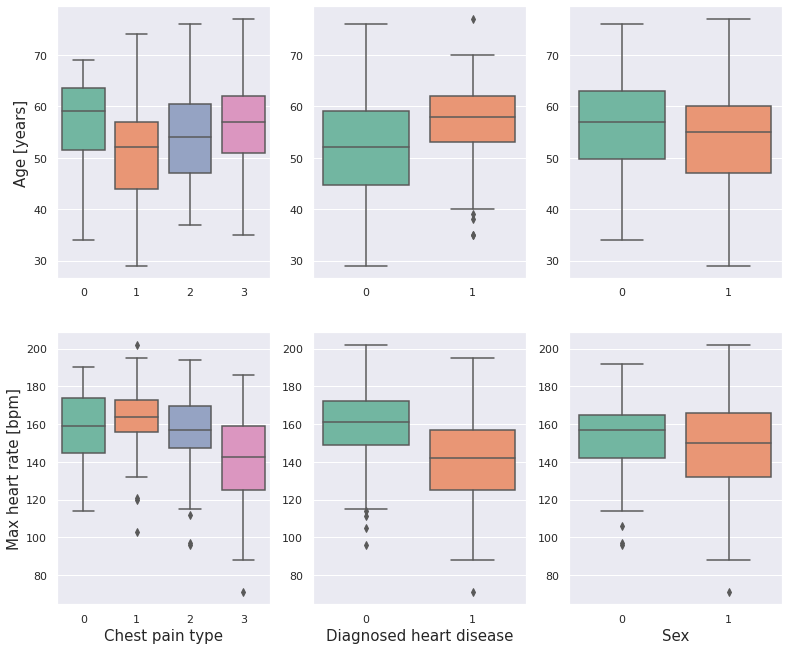

In [6]:
sns.set()
sns.set_palette('Set2')
fig, axes = plt.subplots(2, 3, figsize=(13,11))
sns.boxplot(x=dataframe['cp'], y=dataframe['age'], data = dataframe, ax=axes[0,0])
axes[0,0].set_ylabel('Age [years]', fontsize=15); axes[0,0].set_xlabel('')

sns.boxplot(x=dataframe['condition'], y=dataframe['age'], data = dataframe, ax=axes[0,1])
axes[0,1].set_ylabel(''); axes[0,1].set_xlabel('')

sns.boxplot(x=dataframe['sex'], y=dataframe['age'], data = dataframe, ax=axes[0,2])
axes[0,2].set_ylabel(''); axes[0,2].set_xlabel('')

sns.boxplot(x=dataframe['cp'], y=dataframe['thalach'], data = dataframe, ax=axes[1,0])
axes[1,0].set_ylabel('Max heart rate [bpm]', fontsize=15)
axes[1,0].set_xlabel('Chest pain type', fontsize=15)

sns.boxplot(x=dataframe['condition'], y=dataframe['thalach'], data = dataframe, ax=axes[1,1])
axes[1,1].set_ylabel(''); axes[1,1].set_xlabel('Diagnosed heart disease', fontsize=15)

sns.boxplot(x=dataframe['sex'], y=dataframe['thalach'], data = dataframe, ax=axes[1,2])
axes[1,2].set_ylabel(''); axes[1,2].set_xlabel('Sex', fontsize=15)
#plt.savefig('Boxplot')
plt.show()